# 1. Presentación de la empresa, organización o problema específico
#### De acuerdo a la Organización Mundial de la Salud (OMS), ACV es la segunda causa de muerte a nivel global, responsable de aproximadamente 11% de las muertes totales.
#### Este set de datos es utilizado para predecir si un paciente es propenso a tener un ACV basado en los parametros como género, edad, enfermedades varias, y estado de fumador. Cada fila en los datos provee información relevante sobre el paciente.


#### 2. Preguntas y objetivos de la investigación.

Cuál es el género más propenso a tener un acv?  
Cuál es el grado de influencia de ser fumador?  
Existe relación entre el índice de masa corporal y el nivel de glucosa para contraer un acv?  
Qué tanto influye el tipo de trabajo en la posibilidad de tener un acv?  
Aumentan las probabilidades de tener un acv a mayor edad?  
Un nivel alto de hipertensión influye a la hora de tener un acv?  
Tiene relación el estado marital con tener un acv?  


El objetivo de la investigación es ver cuales son las variables mas importantes a la hora de provocar un acv en un paciente. Utilizando un modelo de predicción vamos a poder determinar si una persona es mas propensa a tener un acv.





#### 3. Conformación del equipo de trabajo. 
Martin Marino  
Leandro Bruzzo  
Luis Almaguer

# 4. Indicación de la fuente del dataset y los criterios de selección (Data Acquisition)
#### El dataset fue obtenido de la plataforma Kaggle desde el siguiente link : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

#### Información sobre el data set:
- Creador: fedesoriano - https://www.kaggle.com/fedesoriano

- Información de los atributos: 
1) id: identificador único
2) gender: "Male", "Female" o "Other" (Masculino, Femenino u Otro)
3) age: Edad del paciente
4) hypertension: 0 si el paciente no tiene hipertensión , 1 si el paciente tiene hipertensión
5) heart_disease: 0 si el paciente no tiene enfermedades del corazón, 1 si el paciente tiene enfermedades del corazón
6) ever_married: "No" o "Yes" (No o Sí)
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" (Niño, trabajo en el sector público, nunca trabajó, privado o monotributista)
8) Residence_type: "Rural" or "Urban" 
9) avg_glucose_level: nivel promedio de glucosa en la sangre
10) bmi: Índice de masa corporal
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* (Fumador frecuente, nunca fumó, fuma, desconocido)
12) stroke: 1 si el paciente tuvo un ACV 0 si no lo tuvo (Variable Target)
*Nota: 'Uknown' en smoking_status indica que no se registró un estado del paciente.

Información sobre Kaggle:
Kaggle, una subsidiaria de Google LLC, es una comunidad en línea de científicos de datos y profesionales del aprendizaje automático.

#### 5. Generación del primer Data Wrangling y EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import plotly.express as px


In [30]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [31]:
df.shape

(5110, 12)

In [32]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


#### EDA Utilizando la librería pandas_profiling

In [34]:
df.profile_report(title='Data Profiling')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

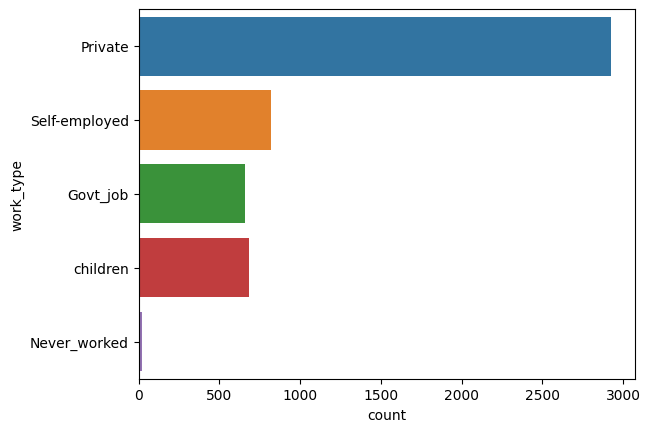

In [35]:
sns.countplot(y='work_type',data=df)
plt.show()

Text(0.5, 1.0, 'BMI')

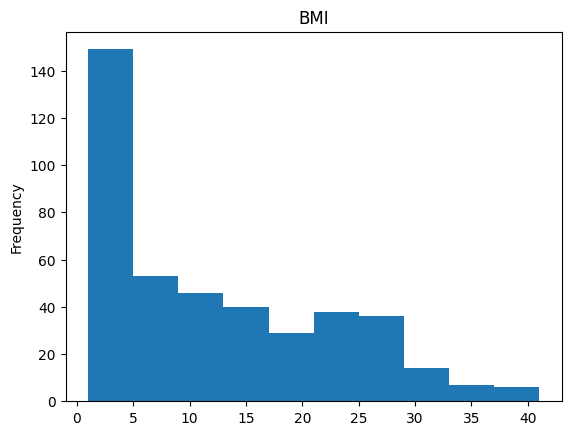

In [36]:
df['bmi'].value_counts().sort_index().plot.hist().set_title('BMI')

Text(0.5, 1.0, 'AVG Glucose Level')

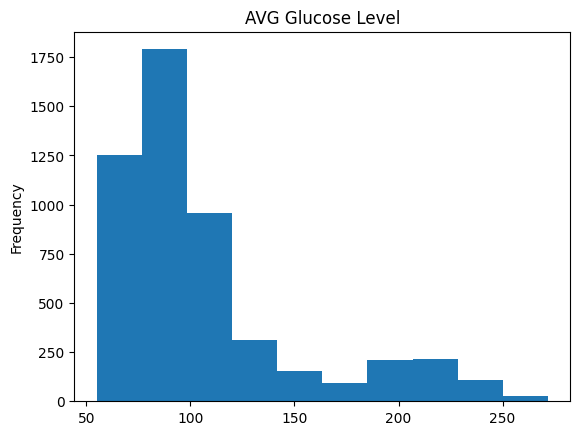

In [37]:
df['avg_glucose_level'].plot.hist().set_title('AVG Glucose Level')

In [38]:
fig = px.pie(df, names="stroke",values='id', hole=.3, title='Stroke')
fig.show()

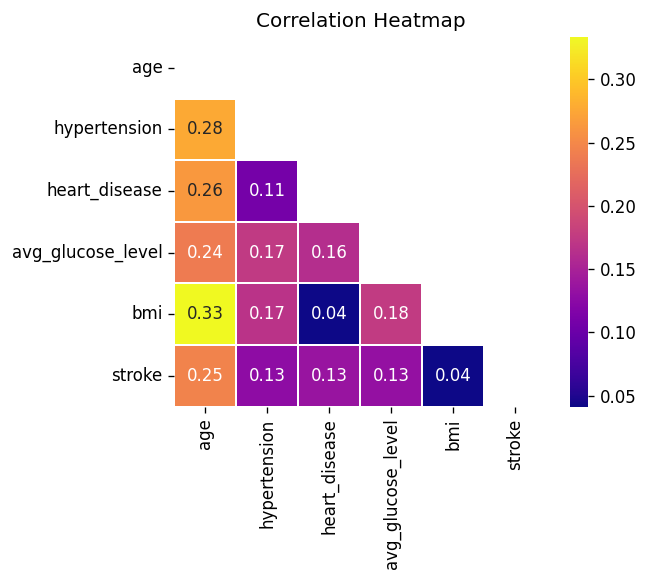

In [44]:
#Creamos un df sin la columna id
dfHeatmap = df.drop(columns=['id'])
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(dfHeatmap.corr(),dtype = bool))
sns.heatmap(dfHeatmap.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

<AxesSubplot:xlabel='age', ylabel='bmi'>

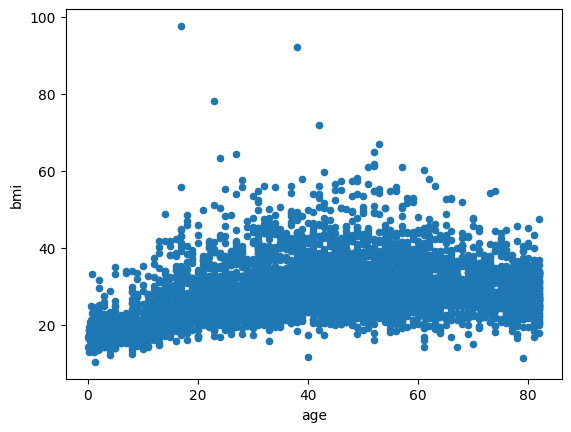

In [45]:
#Scatterplot para observar si hay una correlación entre la edad y el indice de masa corporal.
df.plot.scatter(x='age', y='bmi')

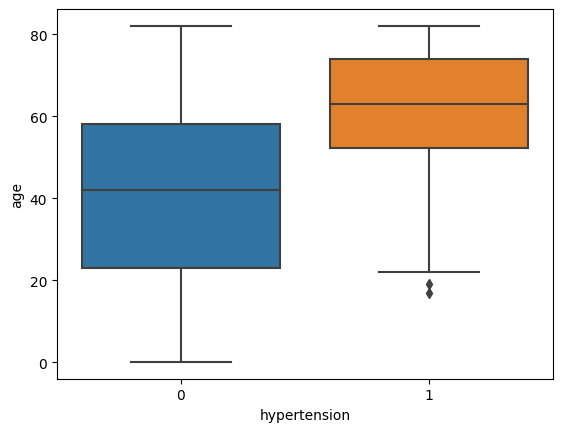

In [46]:
#Con el gráfico de cajas podemos observar que la edad tiene una correlación positiva con la hipertensión.
sns.boxplot(y = 'age', x = 'hypertension', data = df)
plt.show()

c:\Users\Leandro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



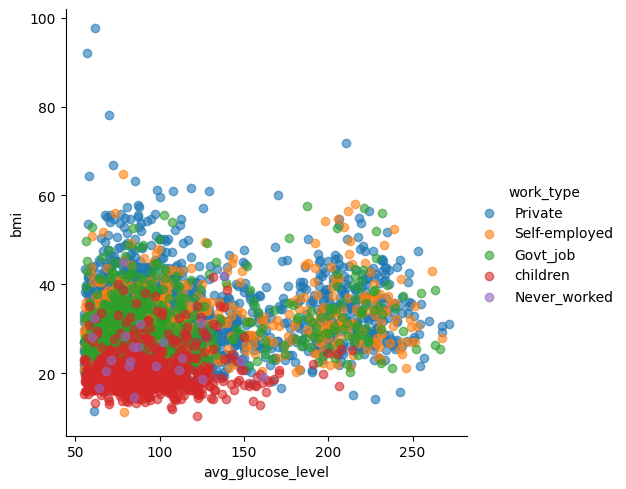

In [39]:
#Intento visualizar si el tipo de trabajo tiene una relación con el índice de masa corporal y el nivel de glucosa en la sangre.  
#Esto nos va a permitir determinar la relación entre estas variables y la  

sns.FacetGrid(df,hue = 'work_type' , size = 5).map(plt.scatter,'avg_glucose_level','bmi', alpha  = 0.6).add_legend();
plt.show()

Text(0, 0.5, 'bmi')

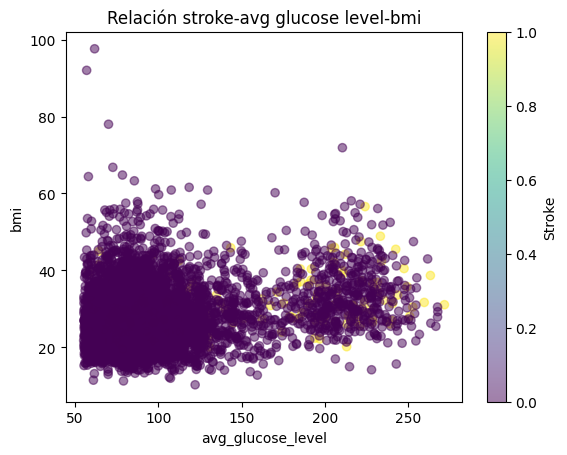

In [40]:
#Profundizando en el análisis las variables de nivel de glucosa e índice de masa corporal,  
#intento visualizar si existe una relación con la probabilidad de tener un acv 

fig, ax = plt.subplots()  
mapeo_colores = ax.scatter(df['avg_glucose_level'], df['bmi'], c=df['stroke'], alpha = 0.5)
fig.colorbar(mapeo_colores, label="Stroke")  #Añado barra de colores

ax.set_title('Relación stroke-avg glucose level-bmi')
ax.set_xlabel('avg_glucose_level')
ax.set_ylabel('bmi')

In [41]:
df['bmi'].mean()

28.893236911794666

In [42]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

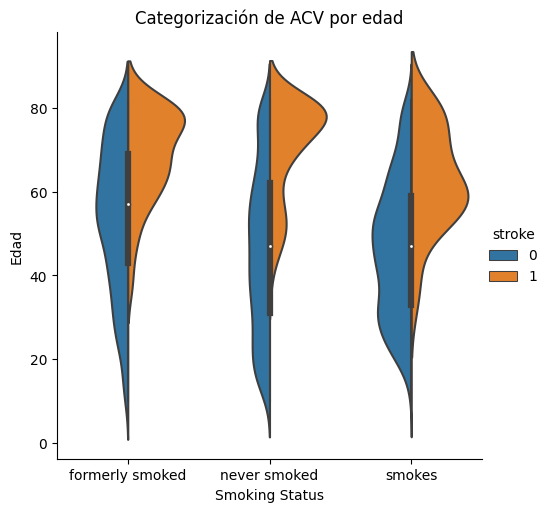

In [43]:
#Intento visualizar el volumen de acv según el estado de fumador y su edad
df_smoking = df[(df['smoking_status']) != 'Unknown']

ax = sns.catplot(data=df_smoking, kind='violin', x='smoking_status', y='age',   hue='stroke', split=True)
ax.set(xlabel='Smoking Status', ylabel='Edad', title='Categorización de ACV por edad')

#### 6. Análisis de componentes principales.

#### 7. Contar la historia de sus datos

#### 8. Filtros aplicados a los datos. Distribución. Dataset final para analizar.

#### 9. Plantear objetivo/s para esos datos.